# Data Lab 2 exercises
1. Slicing
2. Matrix multiply 
3. Read Nino 3.4 and compute the climatology/anomaly in 3 ways

## 1. Add the missing CODE to get the desired output

In [1]:
import numpy as np
from datetime import datetime
months =[datetime(2019, imon, 1) for imon in np.arange(1,12+1)]
month_str = [date_obj.strftime('%b') for date_obj in months]

#CODE HERE
print(month_str)


['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [2]:
# Use a comprehension list (one line) to make a list with the first letter of the month
#CODE HERE
m_str = []
for mon in month_str: 
    m_str.append(mon[0])
print(m_str)

['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']


In [3]:
# Use slices to produce this output
#CODE HERE
m_str[-1::-1]

['D', 'N', 'O', 'S', 'A', 'J', 'J', 'M', 'A', 'M', 'F', 'J']

In [4]:
# Use slices to produce this output
#CODE HERE
m_str[-1::-2]

['D', 'O', 'A', 'J', 'A', 'F']

In [5]:
# Use slices to produce this output
#CODE HERE
m_str[0::2]

['J', 'M', 'M', 'J', 'S', 'N']

## 2. Matrix multiplication

Create a 2D numpy array A and a 1D numpy array
$$ A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}\,, 
x = \begin{bmatrix}
1 \\ -1 \\ 2
\end{bmatrix}
$$
and compute $Ax$.

In [6]:
#CODE HERE
A = np.array([[1,2,3], [4,5,6]])
x = np.array([[1], [-1], [2]])
A@x

array([[ 5],
       [11]])

Construct a function that multipies a matrix times a vector

In [7]:
def matrix_vector_mult(A,x):
    """
    This function returns the product of the matrix A and vector x.
    The product is computed by looping over columns only.
    There is no check that the the number of columns of A is equal to the number of elements of x
    """
    nrows, ncolumns = A.shape
    #CODE HERE
    b = np.zeros([nrows])
    for ii in range(0,ncolumns):
        #CODE HERE
        a = x[ii] * A[:,ii]
        b = b + a
    return b
matrix_vector_mult(A,x)

array([ 5., 11.])

## 3. Read the Nino 3 index 
from http://iridl.ldeo.columbia.edu/SOURCES/.Indices/.nino/.NCEP_OIv2/.NINO3/?Set-Language=en#info and plot it.

### 3.1 Compute its mean and variance.

In [8]:
import xarray as xr
import cftime
# nino_url="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/%5BX/Y%5Daverage/zlev/removeGRID/T/%28Jan%201979%29/%28Dec%202019%29/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
# The above file could not be found, so using the DODS file directly from IRI 
# (Also, since the rest of the problem calls for NINO3.4, I will be using that index rather than NINO3 as the title suggest). 
nino_url = "http://iridl.ldeo.columbia.edu/SOURCES/.Indices/.nino/.NCEP_OIv2/.NINO34/dods"

def fix_calendar(ds, timevar='T'):
    if ds[timevar].attrs['calendar'] == '360':
        ds[timevar].attrs['calendar'] = '360_day'
    return ds

n34_ds = xr.open_dataset(nino_url, decode_times=False)
n34_ds = fix_calendar(n34_ds)
n34_ds = xr.decode_cf(n34_ds)
n34_ds = n34_ds.sel(T=slice("1981-11", "2019-10"))
n34_ds

<xarray.Dataset>
Dimensions:  (T: 456)
Coordinates:
  * T        (T) object 1981-11-16 00:00:00 ... 2019-10-16 00:00:00
Data variables:
    NINO34   (T) float64 ...
Attributes:
    Conventions:  IRIDL

In [9]:
#CODE HERE mean
n34_ds.NINO34.mean()

<xarray.DataArray 'NINO34' ()>
array(0.14304712)

In [10]:
#CODE HERE variance
n34_ds.NINO34.std()

<xarray.DataArray 'NINO34' ()>
array(0.95279944)

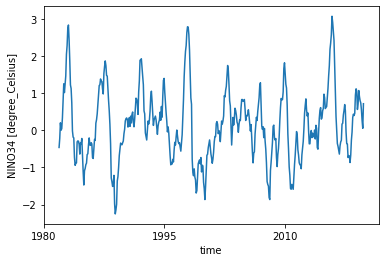

In [11]:
# assign n34_ds.sst to n34 
n34 = n34_ds.NINO34
n34.plot();

### 3.2 Compute the climatology and anomaly

Compute the climatology of Nino 3.4 in 3 different ways and get 3 different answers. 

1. Which one is correct? 
2. Explain the errors Fix the errors in the other two.

In [12]:
# 41 years (38 years for my dataset)
nmonths = n34.size
nmonths/12

38.0

Method 1 (loops)

In [13]:
climatology = np.full(12,np.nan)
anomaly = np.zeros_like(n34)

In [14]:
#for imonth in range(1,12):
#    months = range(imonth, nmonths, 12)
#    climatology[imonth] = n34[months].mean()
#    anomaly[months] = n34[months] - n34[months].mean()

'''Method 1 is incorrect. The error here lies in how the range (months) was established and how the arrays are created. Here, we want months to stand 
for the index of the month called for in the given iteration of the loop. The range here however starts at imonth, ends at 12, and has steps of the
size of n34. In each case, this range would only return 1 value, instead of the index of each value corresponding to a similar month in n34. We can 
fix this by chaging the position of the stop and the step. Additionally, we have to be aware of initial date of our array. The dataset that I have 
used starts at 11-16-1981, so imonth = 1 corresponds to November, rather than January as it was intended. To fix this, we can just change the order
of the final array so that it starts at te January average and ends at the December average. We can leave anomaly as is.'''

for imonth in range(0,12): 
    months = range(imonth, nmonths, 12)
    climatology[imonth] = n34[months].mean()
    anomaly[months] = n34[months] - n34[months].mean()

climatology = np.roll(climatology,-2)

Method 2 (reshape)

In [15]:
# reshape the data so that each of the 41 (38 here) columns contains a year and then average over columns (years) 
# climatology2 = n34.values.reshape(12,-1).mean(axis=1)
# anomaly2 = n34.values.reshape(12,-1).T - climatology
# anomaly2.resize(nmonths)

'''This method is also incorrect. The reshape is not perfomed correctly, the columns do not represent the years. 
Additionally, we must recall that the starting date for this array is 11-16-1981. So a reshape like this cannot 
accurately divide the data into specific years.'''

nyears = nmonths/12.
nyears = int(nyears)

climatology2 = n34.values.reshape(nyears, 12).mean(axis = 0)
anomaly2 = n34.values.reshape(nyears, 12) - climatology2
anomaly2.resize(nmonths)

# Change order so that climatology 2 lines up from Jan to Dec
climatology2 = np.roll(climatology2, -2)

Method 3 (xarray groupby)  
http://xarray.pydata.org/en/stable/groupby.html

In [16]:
climatology3 = n34.groupby("T.month").mean()
anomaly3 = n34.groupby("T.month") - climatology3

'''This method is correct. Grouping by month negates any need to reorder the data such as in the other 2 methods. 
This is by far the most efficient way to calculate the climatology. '''

'This method is correct. Grouping by month negates any need to reorder the data such as in the other 2 methods. \nThis is by far the most efficient way to calculate the climatology. '

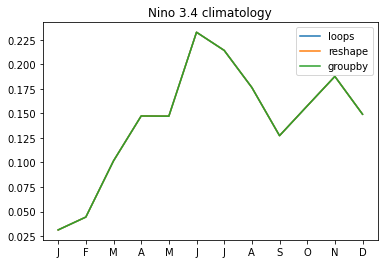

In [17]:
import matplotlib.pyplot as plt
# plot them
plt.plot(climatology,label = 'loops')
plt.plot(climatology2,label = 'reshape')
plt.plot(climatology3, label = 'groupby')
plt.legend()
plt.xticks(np.arange(0,12), m_str)
plt.title('Nino 3.4 climatology');

'It is hard to see, but all three plots are there. I have made the edits so that the anomalies are calculated correctly.'

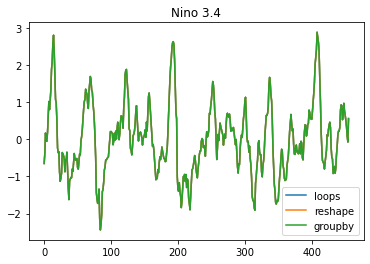

In [18]:
# plot them
plt.plot(anomaly,label = 'loops')
plt.plot(anomaly2,label = 'reshape')
plt.plot(anomaly3, label = 'groupby')
plt.legend()
plt.title('Nino 3.4');

'''It is hard to see, but all three plots are there. I have made the edits so that the anomalies are calculated correctly.'''